### Trajectory analysis of Myocardial Infarction using PILOT

<div class="alert alert-block alert-info">
<b>PILOT</b>

Welcome to the PILOT Package Tutorial for scRNA Data!

Here we show the whole process for applying PILOT to scRNA data using Myocardial Infarction scRNA Data, you can download the Anndata (h5ad) file from [here](https://costalab.ukaachen.de/open_data/PILOT/myocardial_infarction.h5ad).

</div>

In [1]:
import PILOT as pl
import scanpy as sc

##### Reading Anndata

In [2]:
adata=sc.read_h5ad('Datasets/myocardial_infarction.h5ad')

###### Loading the required information and computing the Wasserstein distance:
<div class="alert alert-block alert-info"> In order to work with PILOT, ensure that your Anndata object is loaded and contains the required information.
    
Use the following parameters to configure PILOT for your analysis (Setting Parameters):
    
adata: Pass your loaded Anndata object to PILOT.
    
emb_matrix: Provide the name of the variable in the obsm level that holds the dimension reduction (PCA representation).
    
clusters_col: Specify the name of the column in the observation level of your Anndata that corresponds to cell types or clusters.
    
sample_col: Indicate the column name in the observation level of your Anndata that contains information about samples or patients.
    
status: Provide the column name that represents the status or disease (e.g., "control" or "case").
       
</div>

In [3]:
pl.tl.wasserstein_distance(adata,emb_matrix='PCA',
clusters_col='cell_subtype',sample_col='sampleID',status='Status')

##### Ploting the Cost matrix and the Wasserstein distance:
<div class="alert alert-block alert-info"> 
 Here we show the heatmaps of Cost matrix (cells) and Wasserstein distance (samples).      
</div>

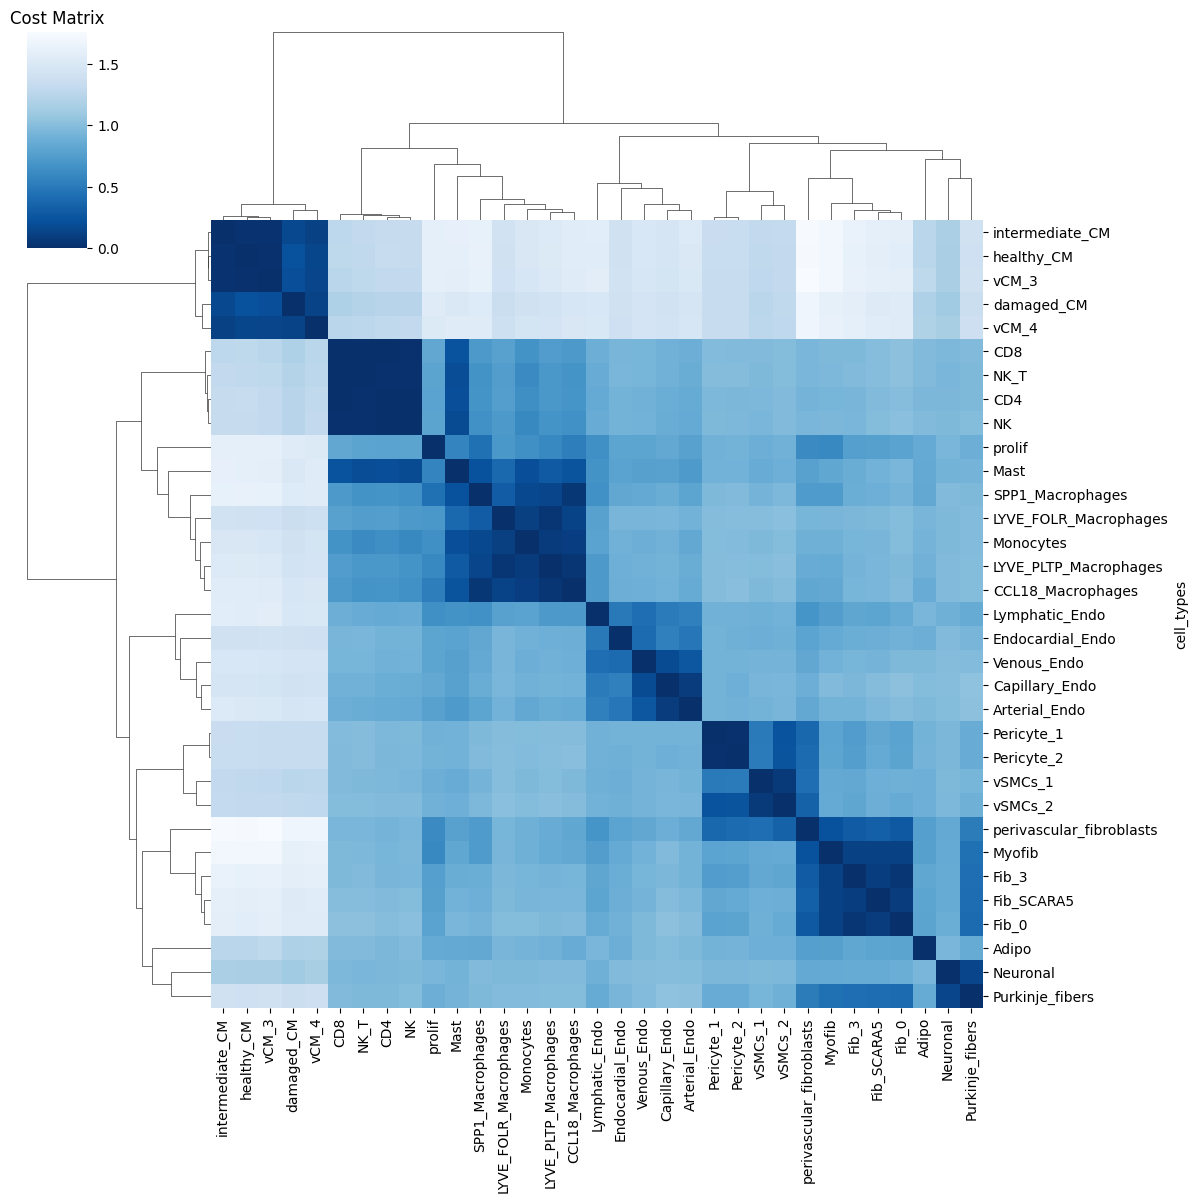

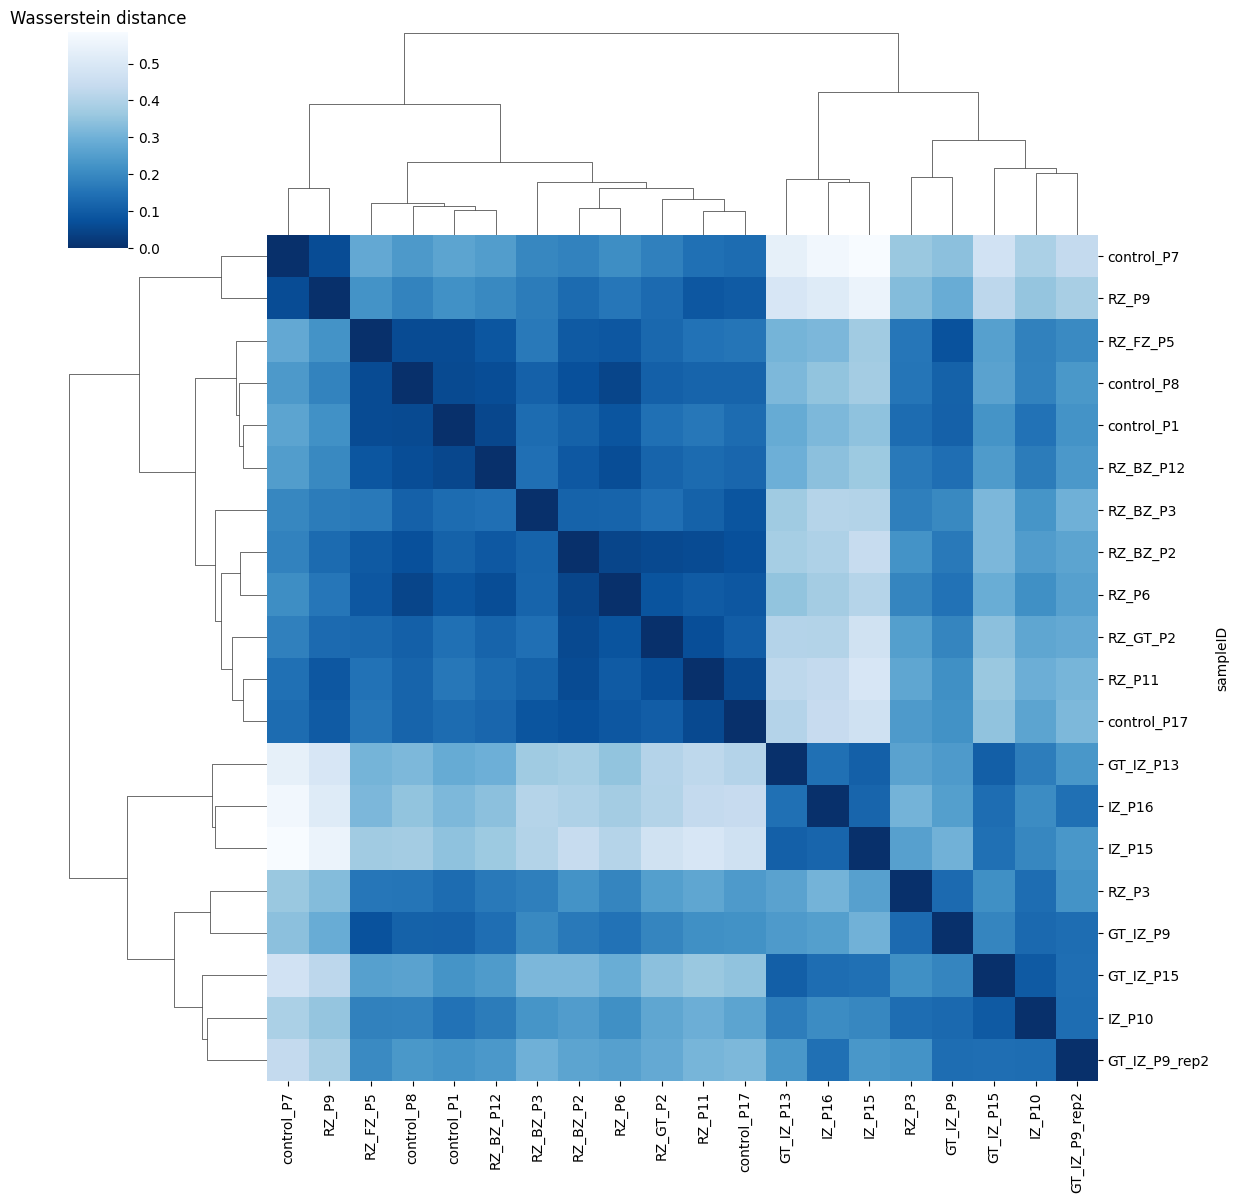

In [4]:
pl.pl.heatmaps(adata)

##### Trajectory:
<div class="alert alert-block alert-info"> 
 Here we show the Diffusion map of Wasserstein distance.
</div>

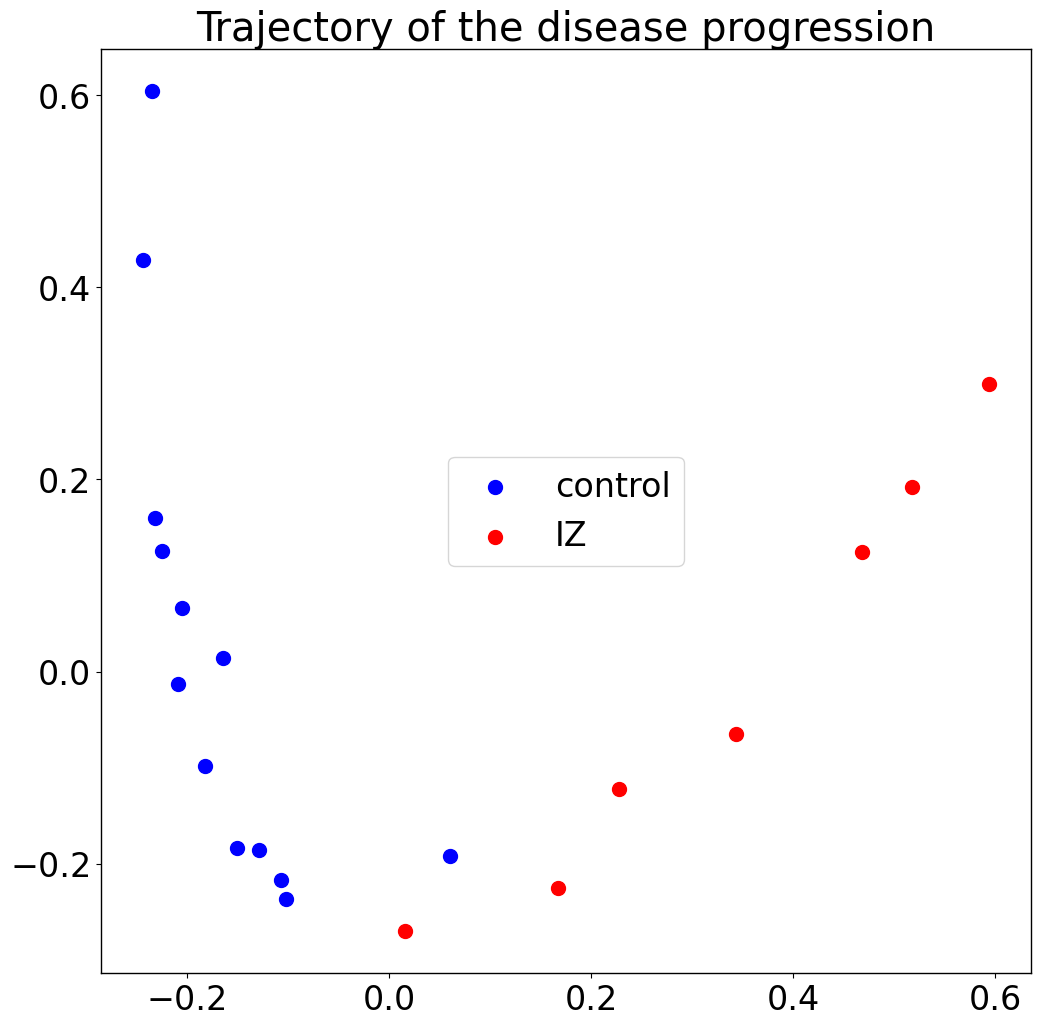

In [5]:
pl.pl.trajectory(adata,colors=['Blue','red'])

#####  Fit a principal graph:
<div class="alert alert-block alert-info"> 
The difussion map creates an embeding that potentially reveals a trajectory in the data. Next, PILOT explores EIPLGraph to find the structure of the trajectory. An important parameter is the source_node, which indicate the start of the trajectory. Here, we selected a control sample. This method returns a rank samples, which we define as a disease progression score (t = t1, ..., tn), where tl represents the ranking of the nth sample.
</div>


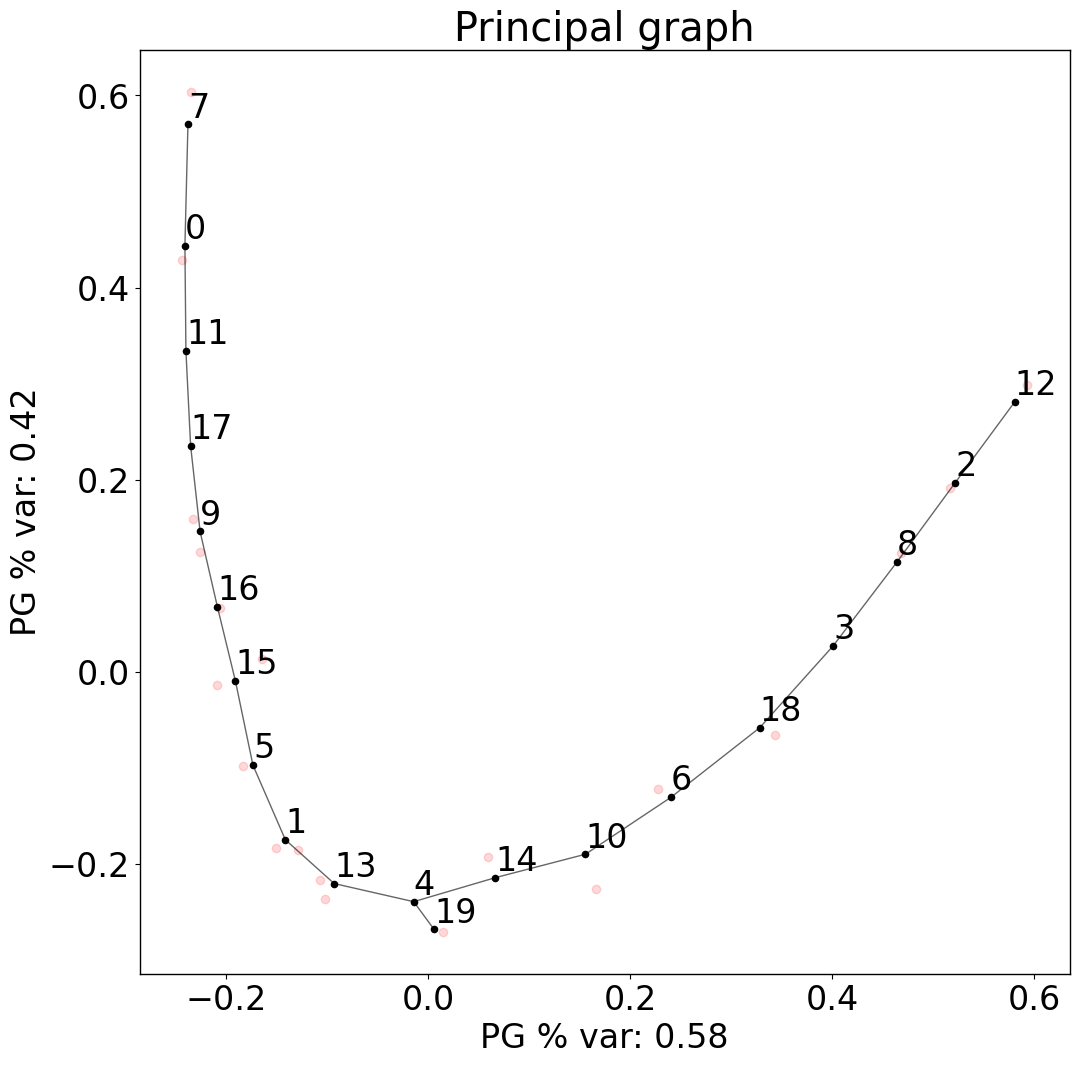

In [6]:
pl.pl.fit_pricipla_graph(adata,source_node=7)

#####  Cell-type importance:
<div class="alert alert-block alert-info"> 
Next, we can use the robust regression model to find cells whose proportions change linearly or non-linearly with disease progression. As indicated in the paper, major halmarks of MI progression are detected, i.e., a decrease of cardiomyocyte cells (CM) and an increase of fibroblasts and myeloid cells.
</div>

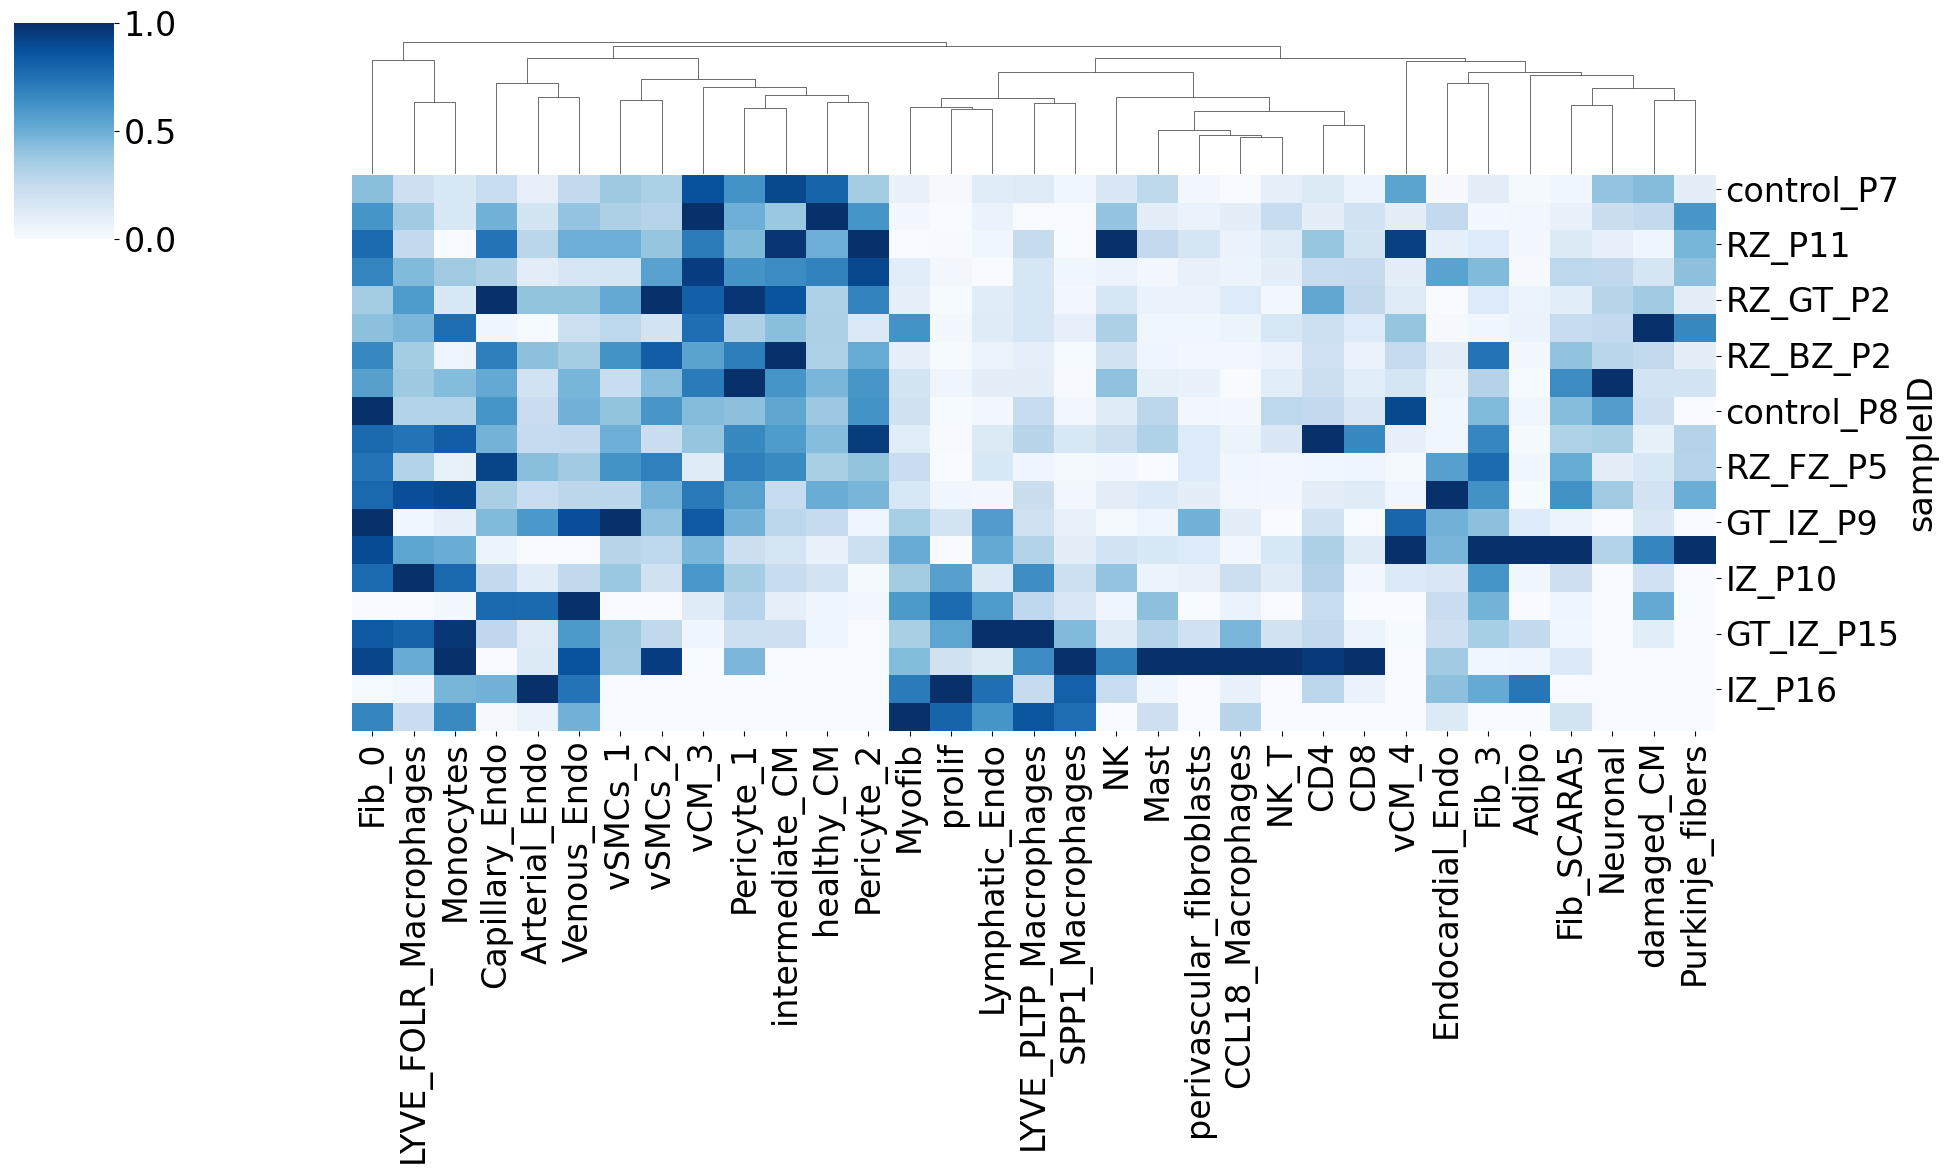

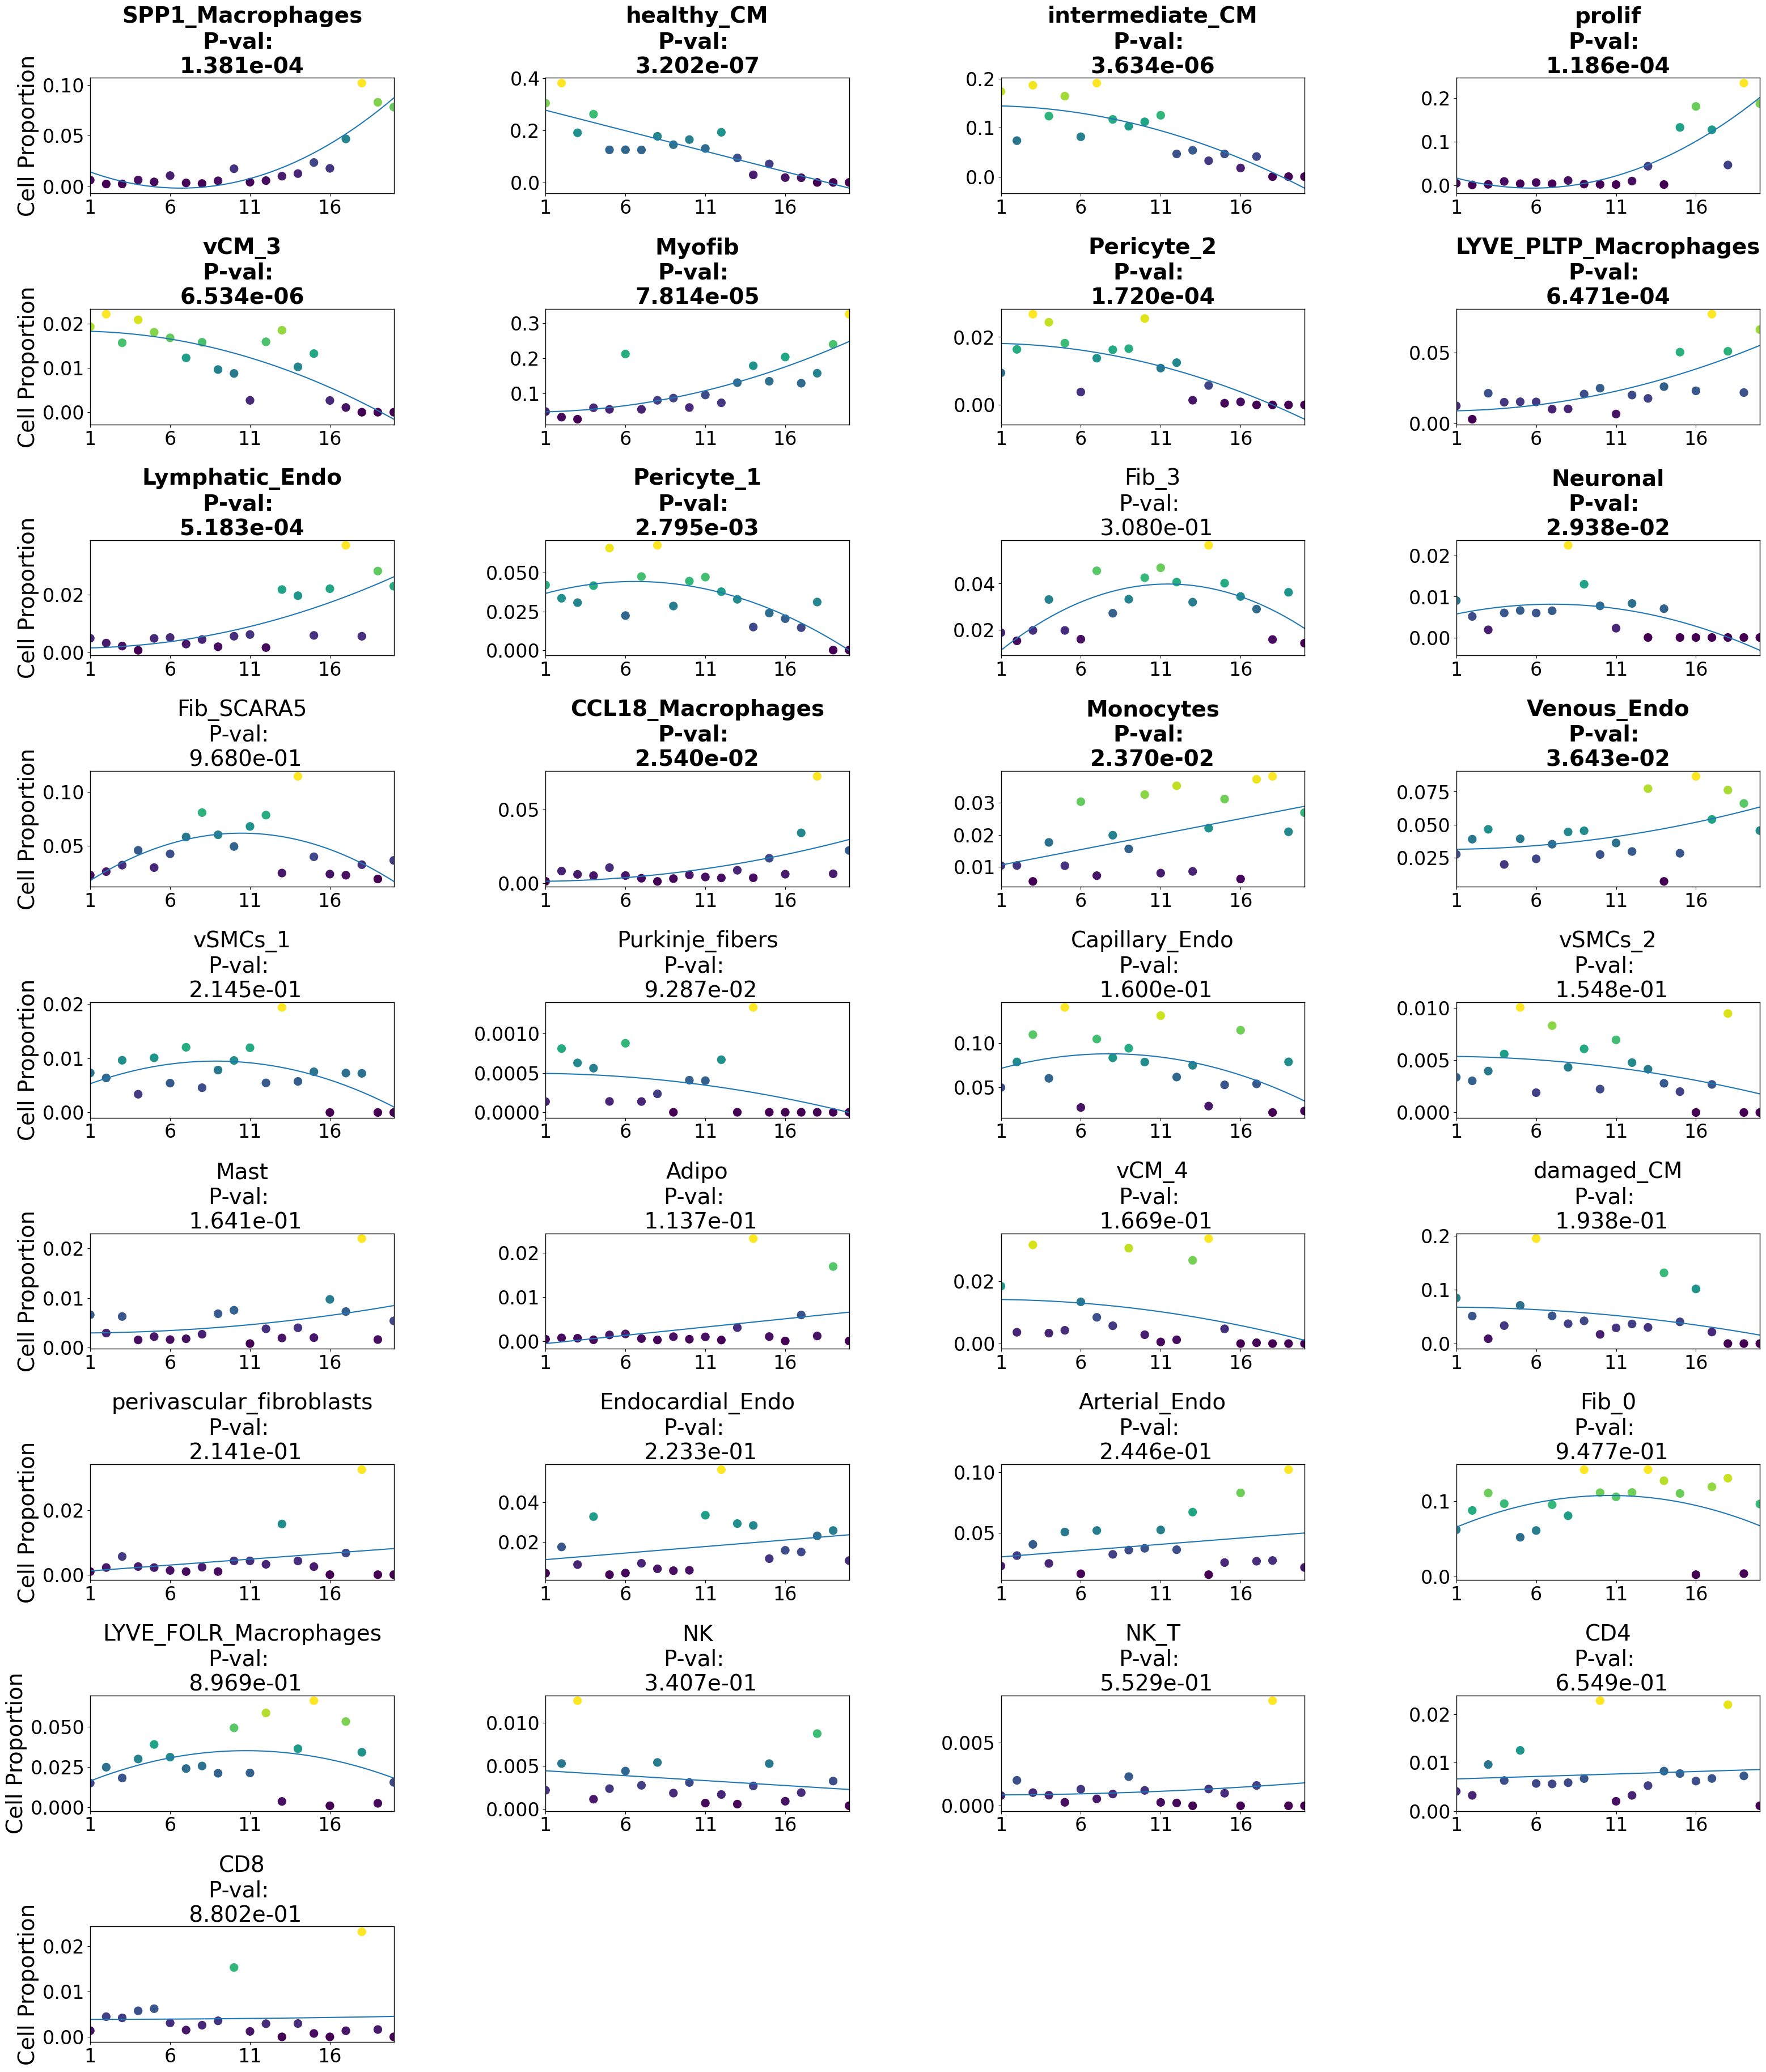

In [7]:
pl.tl.cell_importance(adata,height=45,width=38,fontsize=28)

##### Applyin PILOT for finding Markers

##### Gene selection:
<div class="alert alert-block alert-info"> 
Given that we found interesting cell types, we would like next to investigate genes associated with these trajectories, i.e. genes, which expression changes linear or quadratically with the disease progression. After running the command, you can find a folder named ‘Markers’. There, we will have a folder for each cell type. The file ‘Whole_expressions.csv’ contains all statistics associated with genes for that cell type. Here, we run the genes_importance function for whole cell types.
    
* You need to set names of columns that show cell_types/clusters and Samples/Patinets in your object.
</div>

In [8]:
for cell in adata.uns['cellnames']:
    pl.tl.genes_importance(adata,name_cell=cell,sample_col='sampleID',col_cell='cell_subtype',plot_genes=False)

##### Cluster Specific Marker Changes:
<div class="alert alert-block alert-info"> 
The previous test, only finds genes with significant changes over time for a given cell type. However, it does not consider if a similar pattern and expression values are found in other clusters. To further select genes, we use a Wald test that compares the fit of the gene in the cluster vs. the fit of the gene in other clusters.
In the code below, we consider top genes (regarding the regression fit) for two interesting cell types discussed in the manuscript (‘healthy CM’ and ‘Myofib’).
</div>

In [9]:
pl.tl.gene_cluster_differentiation(adata,cellnames=['healthy_CM','Myofib'],number_genes=70)


<div class="alert alert-block alert-info"> 
Test results are saved in ‘gene_clusters_stats_extend.csv’. To find a final list of genes, we only consider genes with a fold change higher than 0.5, i.e. genes which expression is increased in the cluster at hand; and we sort the genes based on the Wald test p-value. These can be seen bellow.
</div>

In [10]:
df=pl.tl.results_gene_cluster_differentiation(cluster_name='Myofib').head(50)
df.head(15)

gene cluster    waldStat        pvalue        FC  \
2642    GAS7  Myofib  212.477292  8.487275e-46  1.086644   
2151    EXT1  Myofib  125.383128  5.344198e-27  0.786136   
4979  PKNOX2  Myofib   89.738712  2.492742e-19  0.855504   
2529     FN1  Myofib   70.641696  3.110595e-15  1.573680   
1437  COL6A3  Myofib   54.751169  7.758841e-12  1.069156   
5775    RORA  Myofib   52.486295  2.359167e-11  0.899459   
2832  GXYLT2  Myofib   24.247113  2.218154e-05  2.000205   
3783     MGP  Myofib   23.244418  3.591226e-05  0.871041   
4726   PCDH9  Myofib   20.439646  1.376052e-04  0.604830   
1231    CHD9  Myofib   20.389564  1.409364e-04  0.527488   
1710     DCN  Myofib   19.656307  1.999818e-04  1.033697   
2824     GSN  Myofib   18.015612  4.366007e-04  0.638136   
1392  COL3A1  Myofib   17.276479  6.199787e-04  1.240454   
1372  COL1A2  Myofib   14.068816  2.812963e-03  1.327753   
7245    VCAN  Myofib   12.610158  5.560192e-03  0.838764   

            Expression pattern     fit-pvalue  fit-mod-rsquared  
2642  linear up quadratic down  1.873033e-107          0.570704  
2151  linear up quadratic down   3.159831e-35          0.555757  
4979            quadratic down  1.039404e-117          0.544122  
2529  linear down quadratic up  2.947389e-188          0.633774  
1437  linear down quadratic up  3.514298e-172          0.608543  
5775            quadratic down  7.232834e-174          0.587234  
2832  linear up quadratic down   2.402171e-85          0.537920  
3783            quadratic down  1.327779e-225          0.571374  
4726               linear down   0.000000e+00          0.596035  
1231  linear up quadratic down   7.658862e-77          0.559604  
1710  linear up quadratic down  1.866152e-284          0.588602  
2824  linear up quadratic down  2.942472e-279          0.601684  
1392  linear down quadratic up   0.000000e+00          0.665616  
1372  linear down quadratic up   0.000000e+00          0.655032  
7245  linear down quadratic up  1.761922e-164          0.571981

<div class="alert alert-block alert-info"> 
Here is the GO enrichment for  the 50 first top genes of Myofib (FC >= 0.5 and p-value < 0.01).
</div>

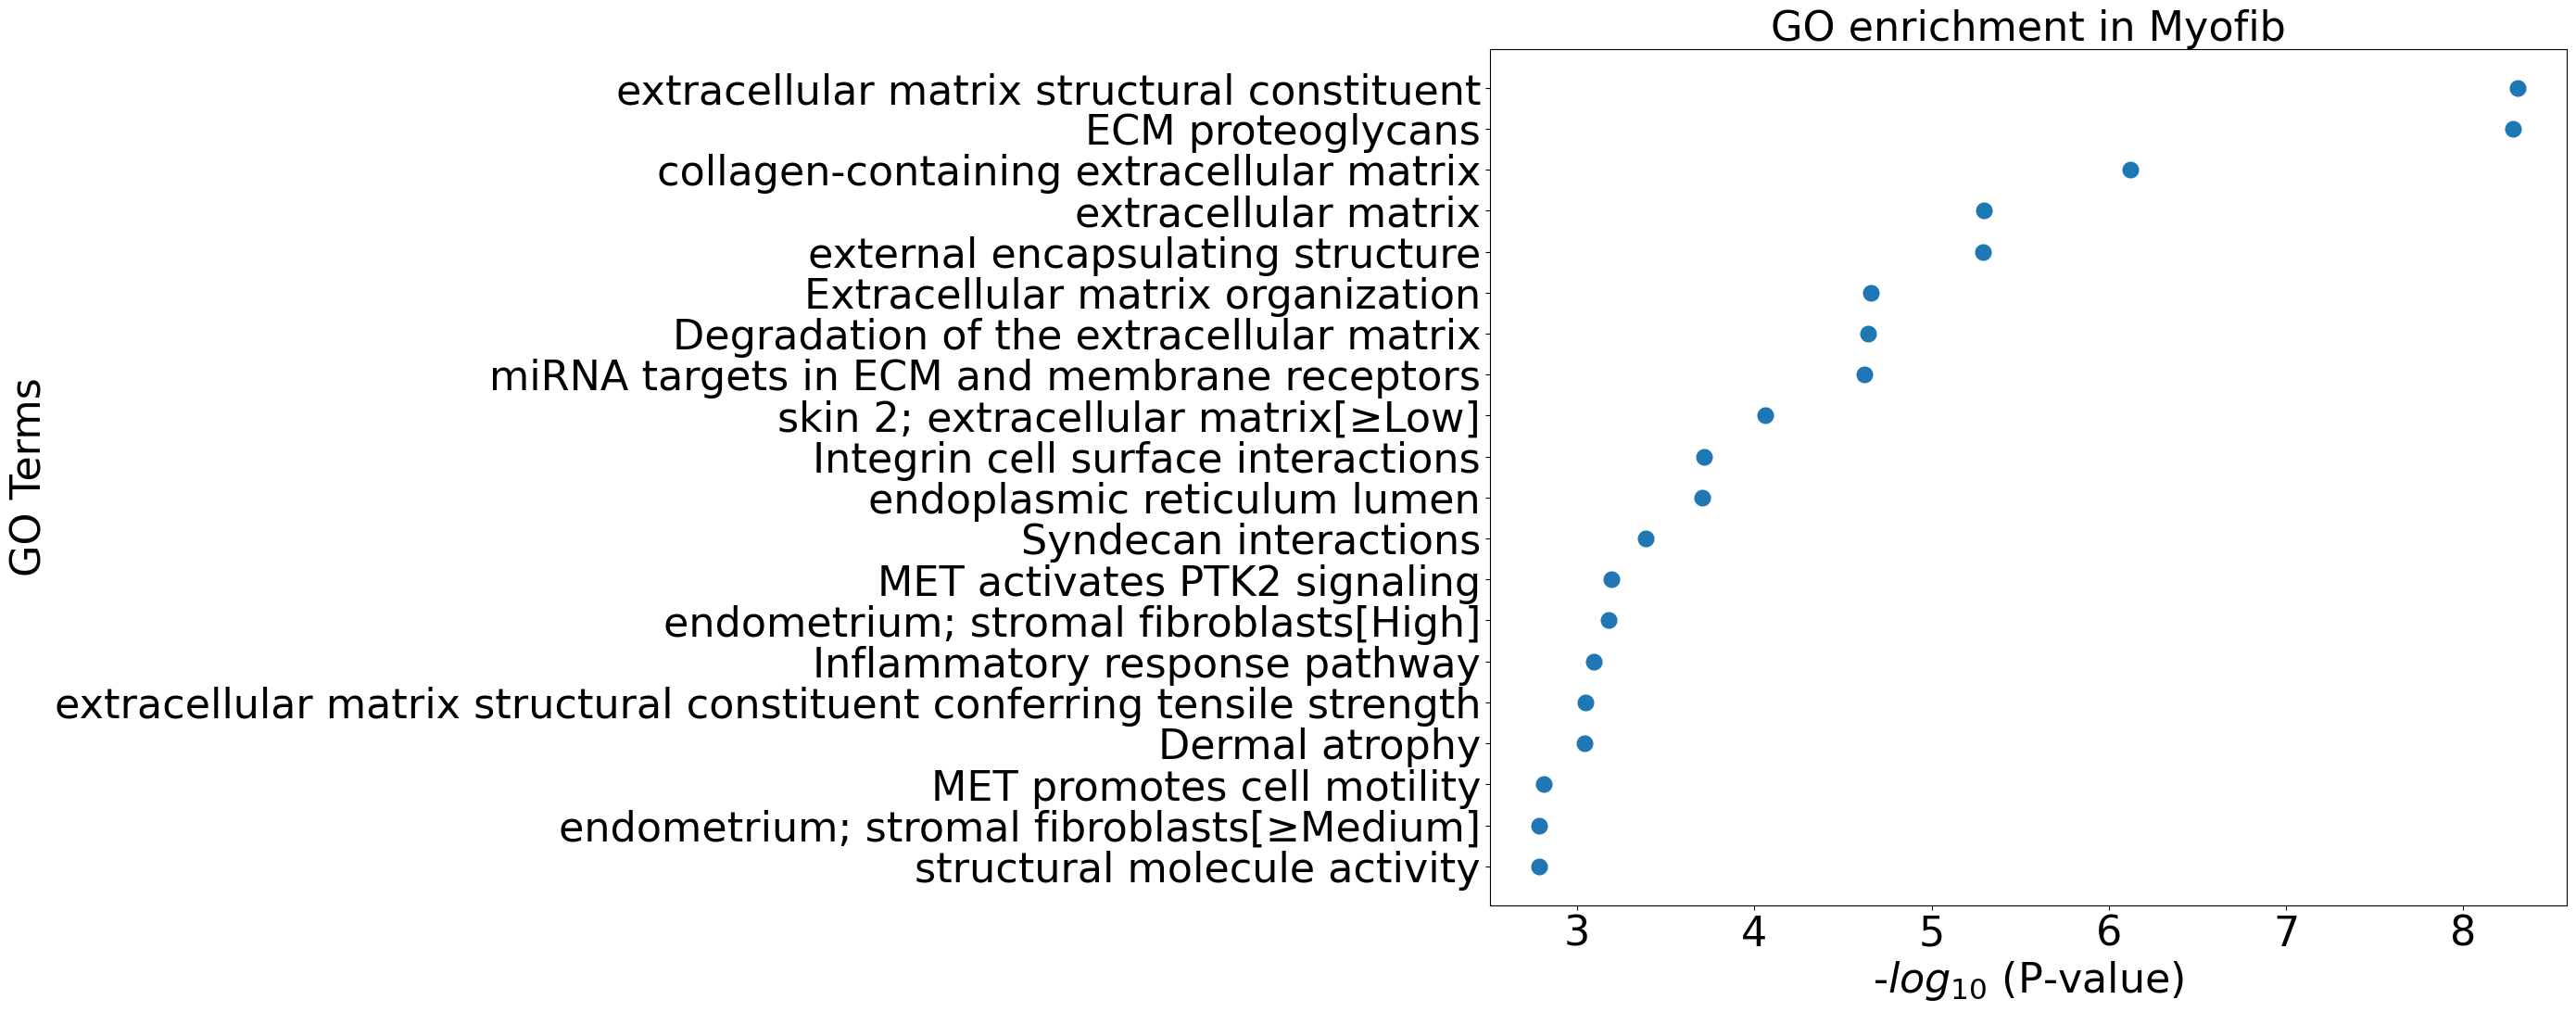

In [11]:
pl.pl.go_enrichment(df,cell_type='Myofib')

<div class="alert alert-block alert-info"> 
Plots of genes are saved at 'plot_genes_for_Myofib' folder. We can also vizualise specfici genes, for example the ones discussed in PILOT manuscript (COL1A2, DCN and EXT1). In the plot, the orange line indicates the fit in the target cell type (shown as orange lines) compared to other cell types (represented by grey lines).
</div>

<Figure size 8000x8000 with 0 Axes>

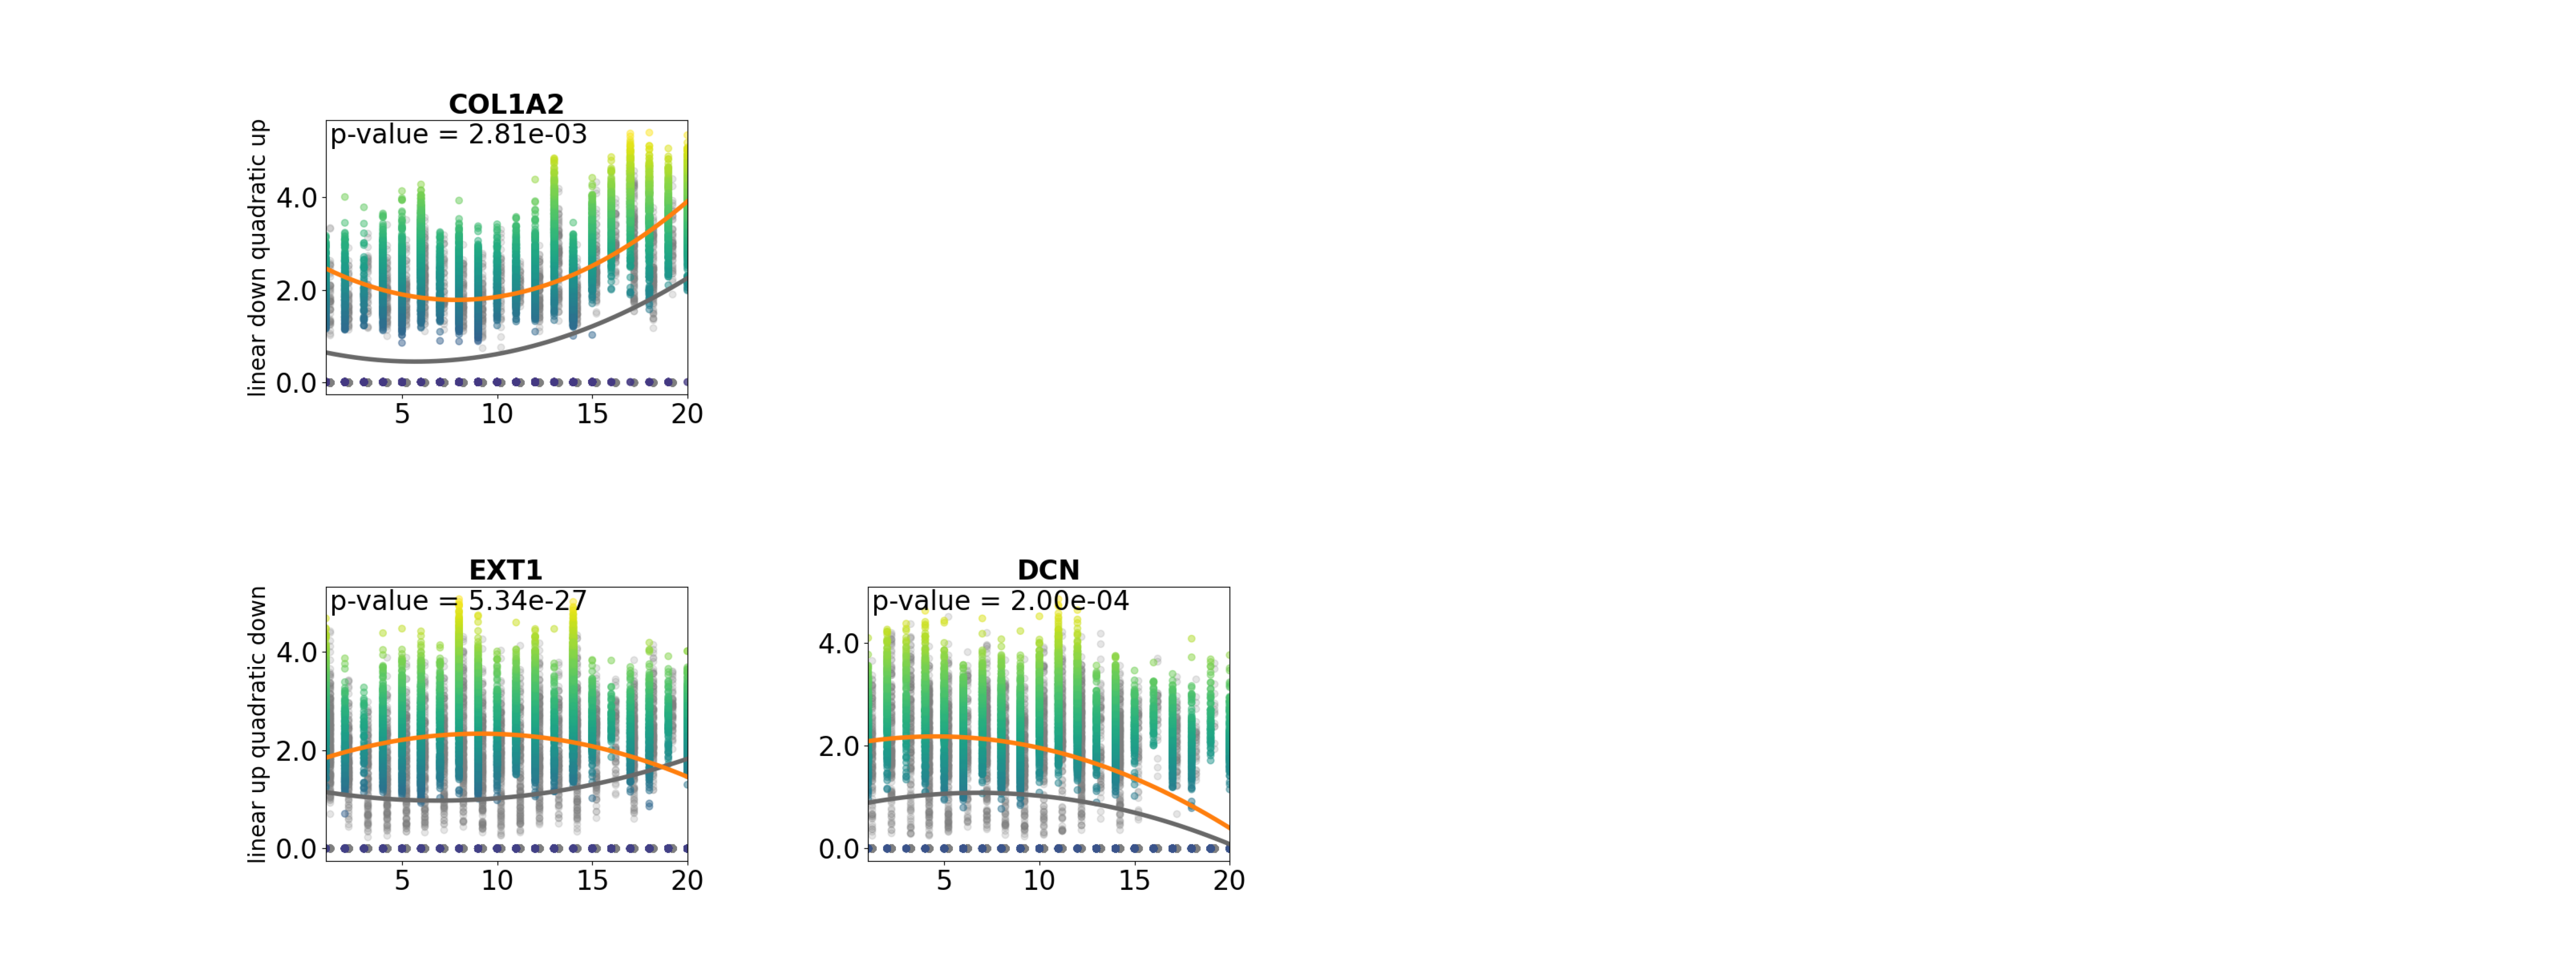

In [12]:
pl.pl.exploring_specific_genes(cluster_name='Myofib',gene_list=['COL1A2','DCN','EXT1'],)

<div class="alert alert-block alert-info"> 
We can repeate the same analysis for healthy_CM cell type by using the following commands.
</div>

In [13]:
df=pl.tl.results_gene_cluster_differentiation(cluster_name='healthy_CM').head(50)
df.head(15)

gene     cluster     waldStat         pvalue        FC  \
6165  SORBS1  healthy_CM  1574.665604   0.000000e+00  1.296470   
1772    DLG2  healthy_CM  1055.313030  1.801893e-228  1.155496   
6733   THSD4  healthy_CM   834.288239  1.583902e-180  1.671315   
1276   CMYA5  healthy_CM   752.301407  9.561746e-163  1.559703   
3281    LDB3  healthy_CM   542.239458  3.342198e-117  1.426196   
36    ABLIM1  healthy_CM   379.423867   6.335728e-82  0.979378   
6903   TNNT2  healthy_CM   373.037957   1.530428e-80  1.392561   
2398   FHOD3  healthy_CM   343.341326   4.125161e-74  1.731741   
6663   TECRL  healthy_CM   338.848075   3.875199e-73  1.261289   
4056  MYBPC3  healthy_CM   296.157297   6.751814e-64  0.686940   
5652   RCAN2  healthy_CM   287.996090   3.940736e-62  1.214055   
1830   DOCK3  healthy_CM   269.653643   3.667754e-58  0.534836   
4177   MYOM1  healthy_CM   236.482875   5.483541e-51  1.637375   
1915   EFNA5  healthy_CM   236.263957   6.115035e-51  1.089847   
5436   PXDNL  healthy_CM   227.066418   5.957588e-49  1.284827   

            Expression pattern     fit-pvalue  fit-mod-rsquared  
6165  linear down quadratic up   8.946560e-05          0.522953  
1772  linear down quadratic up  1.323610e-256          0.556306  
6733  linear down quadratic up  6.088694e-250          0.582085  
1276  linear down quadratic up   3.774063e-66          0.527869  
3281  linear down quadratic up  1.511694e-238          0.546327  
36                   linear up   3.296026e-13          0.513734  
6903  linear down quadratic up  2.329698e-118          0.535236  
2398  linear down quadratic up   0.000000e+00          0.612758  
6663  linear up quadratic down   0.000000e+00          0.570571  
4056  linear up quadratic down   0.000000e+00          0.557570  
5652  linear down quadratic up   0.000000e+00          0.566313  
1830  linear down quadratic up  2.678914e-202          0.527979  
4177               linear down  1.381677e-268          0.548281  
1915               linear down  1.127515e-164          0.532078  
5436  linear down quadratic up   1.815885e-03          0.518712

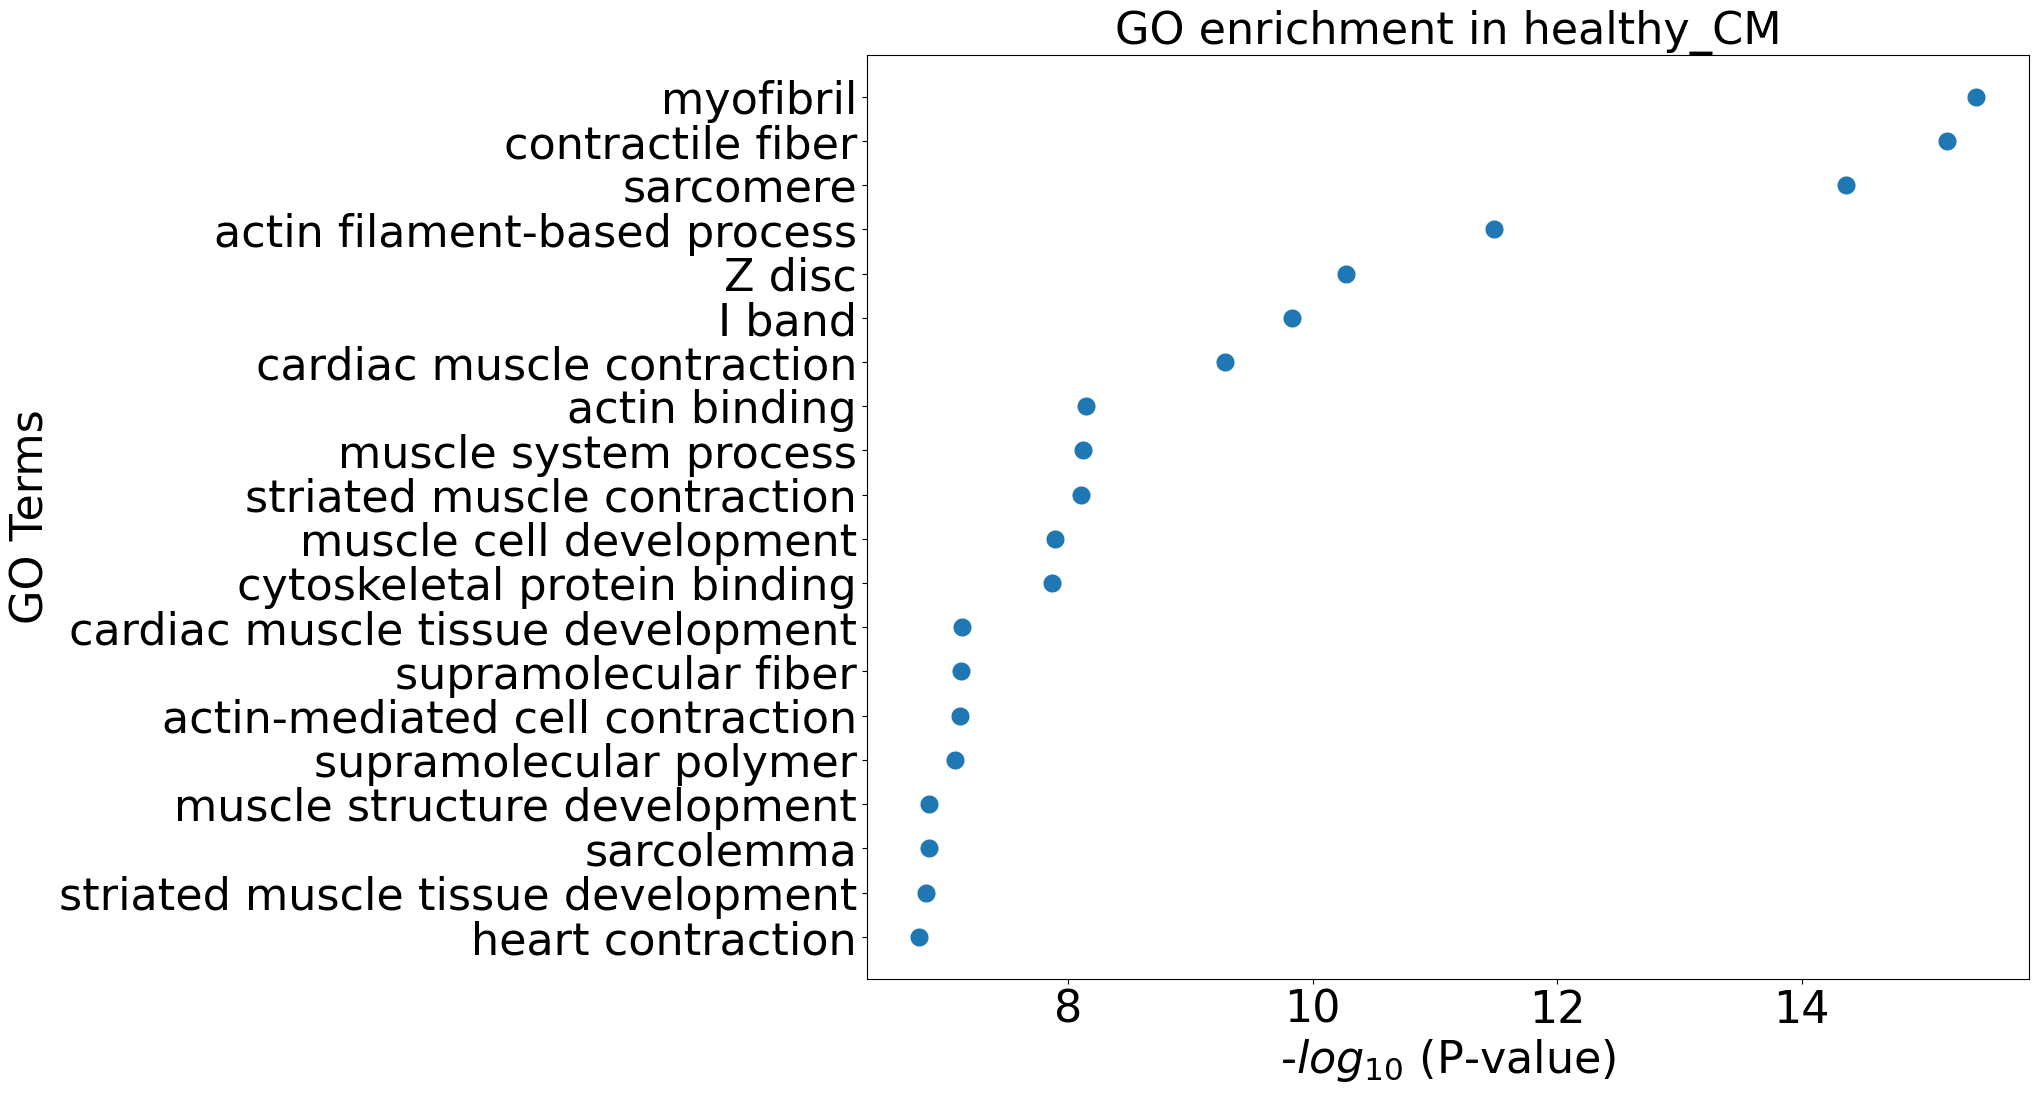

In [14]:
pl.pl.go_enrichment(df,cell_type='healthy_CM')

<Figure size 8000x8000 with 0 Axes>

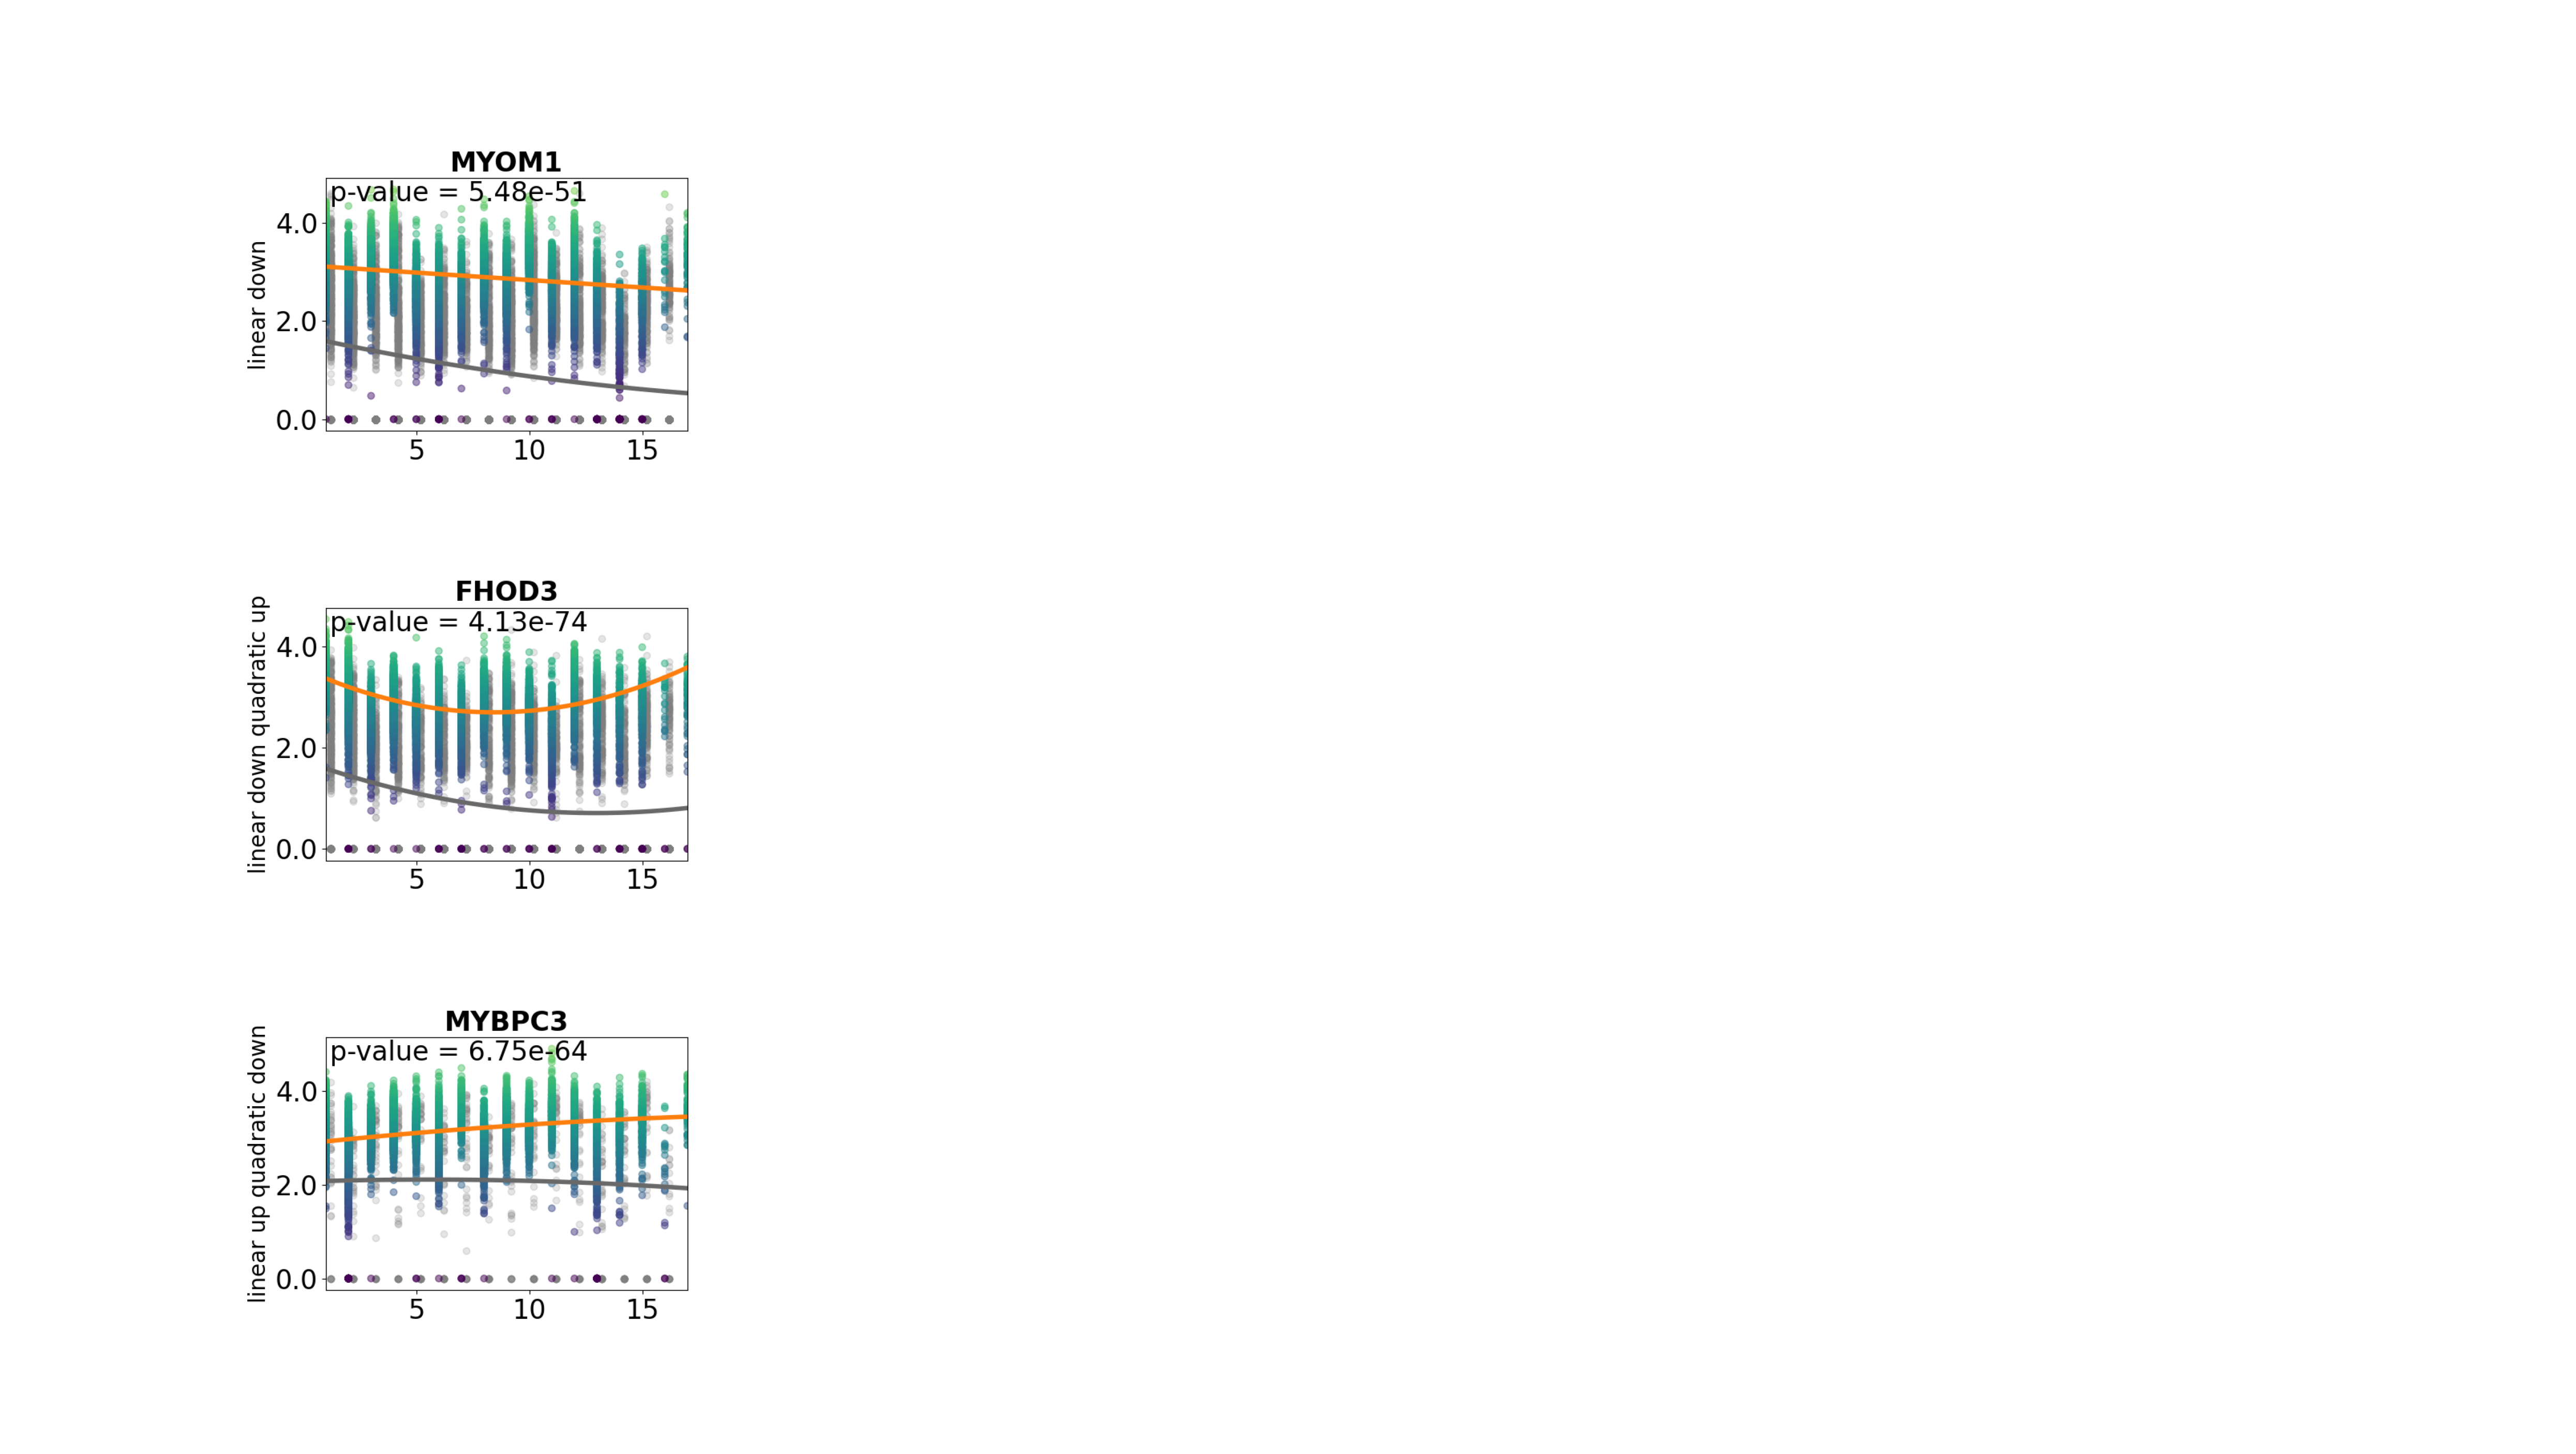

In [15]:
pl.pl.exploring_specific_genes(cluster_name='healthy_CM',gene_list=['MYBPC3','MYOM1','FHOD3'])